In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [19]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [20]:
# df['date'] = pd.to_datetime(df['date'])
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day

# Drop the original date column
df = df.drop(columns=['date'])
df = df.drop(columns=['street'])
df = df.drop(columns=['city'])
df = df.drop(columns=['statezip'])
df = df.drop(columns=['country'])
# df = df.drop(columns=['statezip'])


# Separate features (X) and target variable (y)
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/standardize features (only numeric)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame (optional, for readability)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(X_train_scaled.head())

   bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront      view  \
0  0.670520   0.436902     0.660971  0.870054  0.910403   -0.085972 -0.306194   
1  0.670520   1.074918     1.652011  0.406802  0.910403   -0.085972 -0.306194   
2  0.670520   0.436902     0.702699 -0.097288  0.910403   -0.085972 -0.306194   
3  0.670520   2.031941     1.975402 -0.106289  0.910403   -0.085972 -0.306194   
4 -0.430066  -0.201114    -0.142292 -0.213165  0.910403   -0.085972 -0.306194   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  
0   0.808830    1.105179      -0.679582  0.626721     -0.822446  
1  -0.672013    2.211185      -0.679582  0.693925     -0.822446  
2  -0.672013    1.151748      -0.679582  0.391508     -0.822446  
3  -0.672013    2.572092      -0.679582  1.197954     -0.822446  
4  -0.672013    0.208732      -0.679582 -1.826218      1.206786  


In [21]:
# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

# Model 2: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)

In [22]:
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression Metrics:")
print(f"MSE: {lr_mse:.2f}")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R²: {lr_r2:.2f}")

Linear Regression Metrics:
MSE: 986906943353.05
RMSE: 993431.90
R²: 0.03


In [23]:
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_predictions)

print(f"\nDecision Tree Metrics:")
print(f"MSE: {dt_mse:.2f}")
print(f"RMSE: {dt_rmse:.2f}")
print(f"R²: {dt_r2:.2f}")


Decision Tree Metrics:
MSE: 1051382647092.09
RMSE: 1025369.52
R²: -0.03


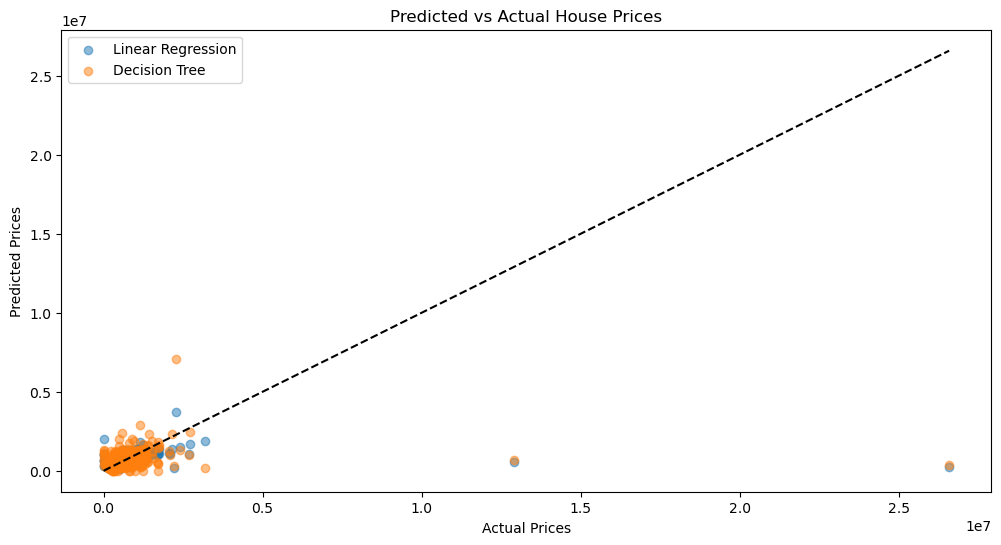

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, lr_predictions, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, dt_predictions, alpha=0.5, label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual House Prices')
plt.legend()
plt.show()


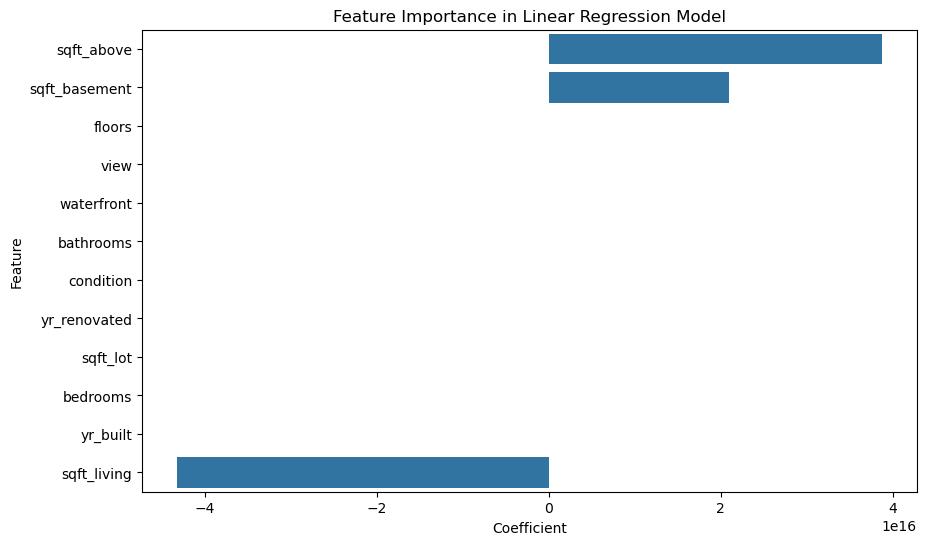

In [25]:
# For Linear Regression, we can see which features had the most impact
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance in Linear Regression Model')
plt.show()

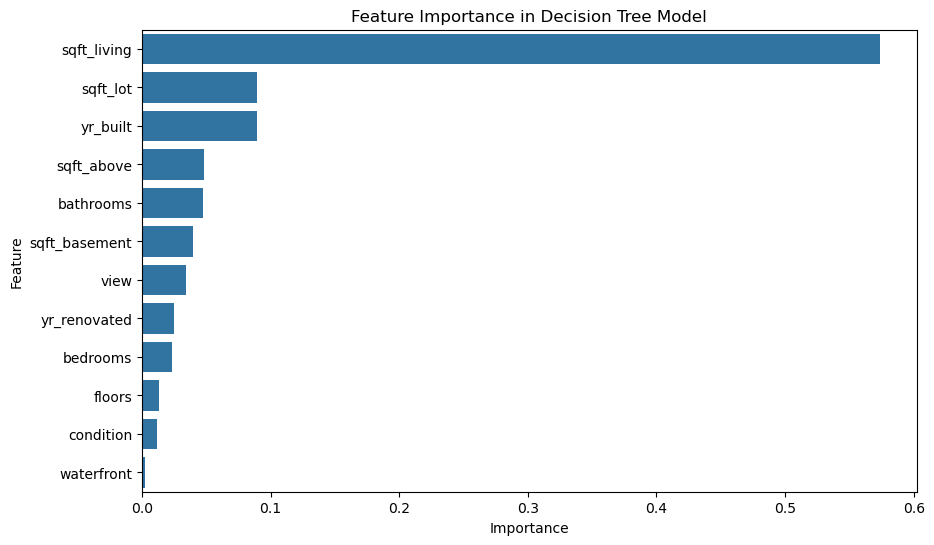

In [26]:
importances = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance in Decision Tree Model')
plt.show()